In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import warnings

warnings.filterwarnings("ignore")
sns.set_style()
plt.style.use('seaborn')

# Import datasets

In [2]:
path = '../Reporting-Country_sales/Dataset/'
list_data = []
list_length = []
for file in os.listdir(path): 
    if file.endswith('.csv'):
        df = pd.read_csv(path + file)
        list_data.append(df)
        list_length.append(len(df))
df = pd.concat(list_data)

In [3]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [4]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,3.016100e+06,3.016100e+06,3.016100e+06,3.016100e+06,3.016100e+06,3.016100e+06,3.016100e+06
mean,5.498383e+08,4.999218e+03,2.660467e+02,1.875406e+02,1.329820e+06,9.374307e+05,3.923892e+05
std,2.599660e+08,2.885236e+03,2.169899e+02,1.756574e+02,1.468601e+06,1.148981e+06,3.788636e+05
min,1.000012e+08,1.000000e+00,9.330000e+00,6.920000e+00,9.330000e+00,6.920000e+00,2.410000e+00
25%,3.245117e+08,2.502000e+03,8.173000e+01,3.584000e+01,2.778672e+05,1.618179e+05,9.512776e+04
50%,5.493012e+08,4.998000e+03,1.540600e+02,9.744000e+01,7.852172e+05,4.672248e+05,2.813486e+05
75%,7.752836e+08,7.497000e+03,4.218900e+02,2.633300e+02,1.822565e+06,1.196909e+06,5.653814e+05
max,9.999999e+08,1.000000e+04,6.682700e+02,5.249600e+02,6.682700e+06,5.249600e+06,1.738700e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   Item Type       object 
 3   Sales Channel   object 
 4   Order Priority  object 
 5   Order Date      object 
 6   Order ID        int64  
 7   Ship Date       object 
 8   Units Sold      int64  
 9   Unit Price      float64
 10  Unit Cost       float64
 11  Total Revenue   float64
 12  Total Cost      float64
 13  Total Profit    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 264.6+ MB


## Bảng giá của mỗi loại vật phẩm: tiền, chi phí mỗi vật phẩm

In [6]:
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00


In [7]:
df_cost_item = df[df.duplicated(subset=['Item Type'])==False]
df_cost_item = df_cost_item[['Item Type', 'Unit Price','Unit Cost']]
df_cost_item

,Item Type,Unit Price,Unit Cost
0,Fruits,9.33,6.92
1,Clothes,109.28,35.84
2,Meat,421.89,364.69
4,Beverages,47.45,31.79
8,Office Supplies,651.21,524.96
9,Cosmetics,437.20,263.33
12,Snacks,152.58,97.44
14,Personal Care,81.73,56.67
21,Household,668.27,502.54
22,Vegetables,154.06,90.93


# General
## TASK 1: Tỉ lệ mua hàng online và offline

In [8]:
general_ratio_sales = df['Sales Channel'].value_counts()
pd.DataFrame(general_ratio_sales)

,Sales Channel
Offline,1508462
Online,1507638


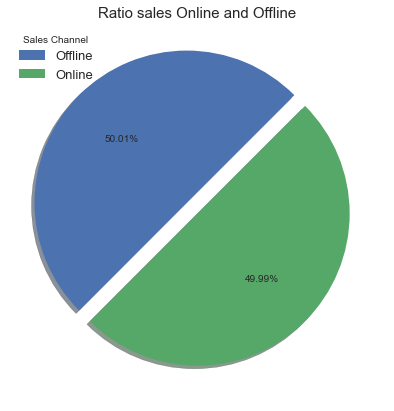

In [9]:
fig , ax = plt.subplots (figsize=(7,7))
label_OnOff = ['Offline','Online']
myexplode = [0.1, 0]
ax.pie(general_ratio_sales,
       autopct='%1.2f%%',shadow = True, explode = myexplode,startangle = 45)
plt.title("Ratio sales Online and Offline",
          fontsize = 15)
plt.legend(label_OnOff,title = "Sales Channel",loc='upper left',fontsize=13);

## TASK 2: Doanh thu, chi phí, lợi nhuận theo từng năm

In [10]:
df['Year'] = df['Ship Date'].apply(lambda address : address.split('/')[2])
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,2012
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,2013
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,2015


In [11]:
general_revenue_year = df.groupby('Year')['Total Revenue','Total Cost','Total Profit'].sum()
general_revenue_year_np = np.array(general_revenue_year)
general_revenue_year_np = general_revenue_year_np.T

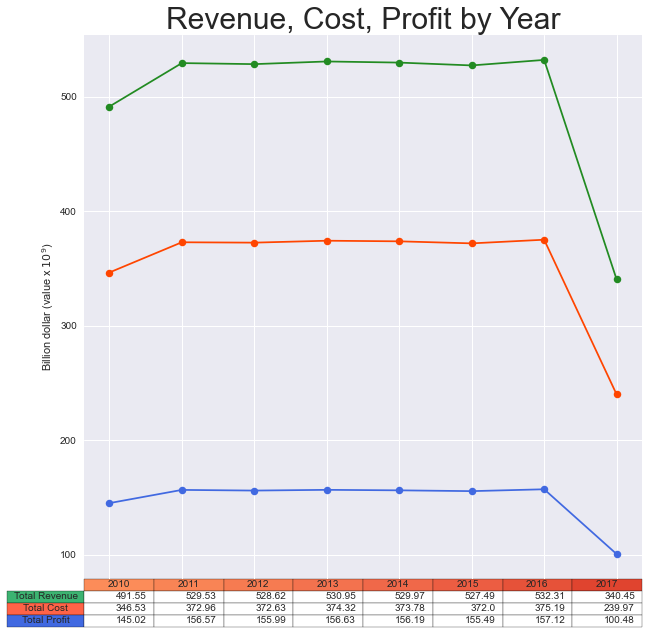

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
general_revenue_year_np_data = np.round(general_revenue_year_np/10**9,2)

ax.plot(general_revenue_year.index,general_revenue_year_np_data[0],color = 'forestgreen',marker= '.',markersize=15)
ax.plot(general_revenue_year.index,general_revenue_year_np_data[1],color = 'orangered',marker= '.',markersize=15)
ax.plot(general_revenue_year.index,general_revenue_year_np_data[2],color = 'royalblue',marker= '.',markersize=15)

ax.set(ylabel ='Billion dollar (value x $10^9$)')
plt.axis("tight")
plt.title('Revenue, Cost, Profit by Year',fontsize = 30)

ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])

colors_row = ['mediumseagreen','tomato','royalblue']
colors_col = plt.cm.OrRd(np.linspace(0.5, 0.7, len(general_revenue_year.index)))
ax.table(   cellText = general_revenue_year_np_data,
            rowLabels=general_revenue_year.columns,
            colLabels=general_revenue_year.index,
            rowColours=colors_row,
            colColours=colors_col,
            rowLoc='center',
            loc='bottom'
        );

### TASK 2*: Tạo ra các file country sales theo năm

In [13]:
df['Year'] = pd.to_numeric(df['Year'])
sorted(set(df['Year']))

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

In [14]:
out_path = "../Reporting-Country_sales/Dataset_Year/"

df[df['Year'] == 2010].to_csv(out_path + 'Country sales 2010.csv')
df[df['Year'] == 2011].to_csv(out_path + 'Country sales 2011.csv')
df[df['Year'] == 2012].to_csv(out_path + 'Country sales 2012.csv')
df[df['Year'] == 2013].to_csv(out_path + 'Country sales 2013.csv')
df[df['Year'] == 2014].to_csv(out_path + 'Country sales 2014.csv')
df[df['Year'] == 2015].to_csv(out_path + 'Country sales 2015.csv')
df[df['Year'] == 2016].to_csv(out_path + 'Country sales 2016.csv')
df[df['Year'] == 2017].to_csv(out_path + 'Country sales 2017.csv')

## TASK 3: Tần xuất giá trị của các đơn hàng theo thứ tự ưu tiên mặt hàng

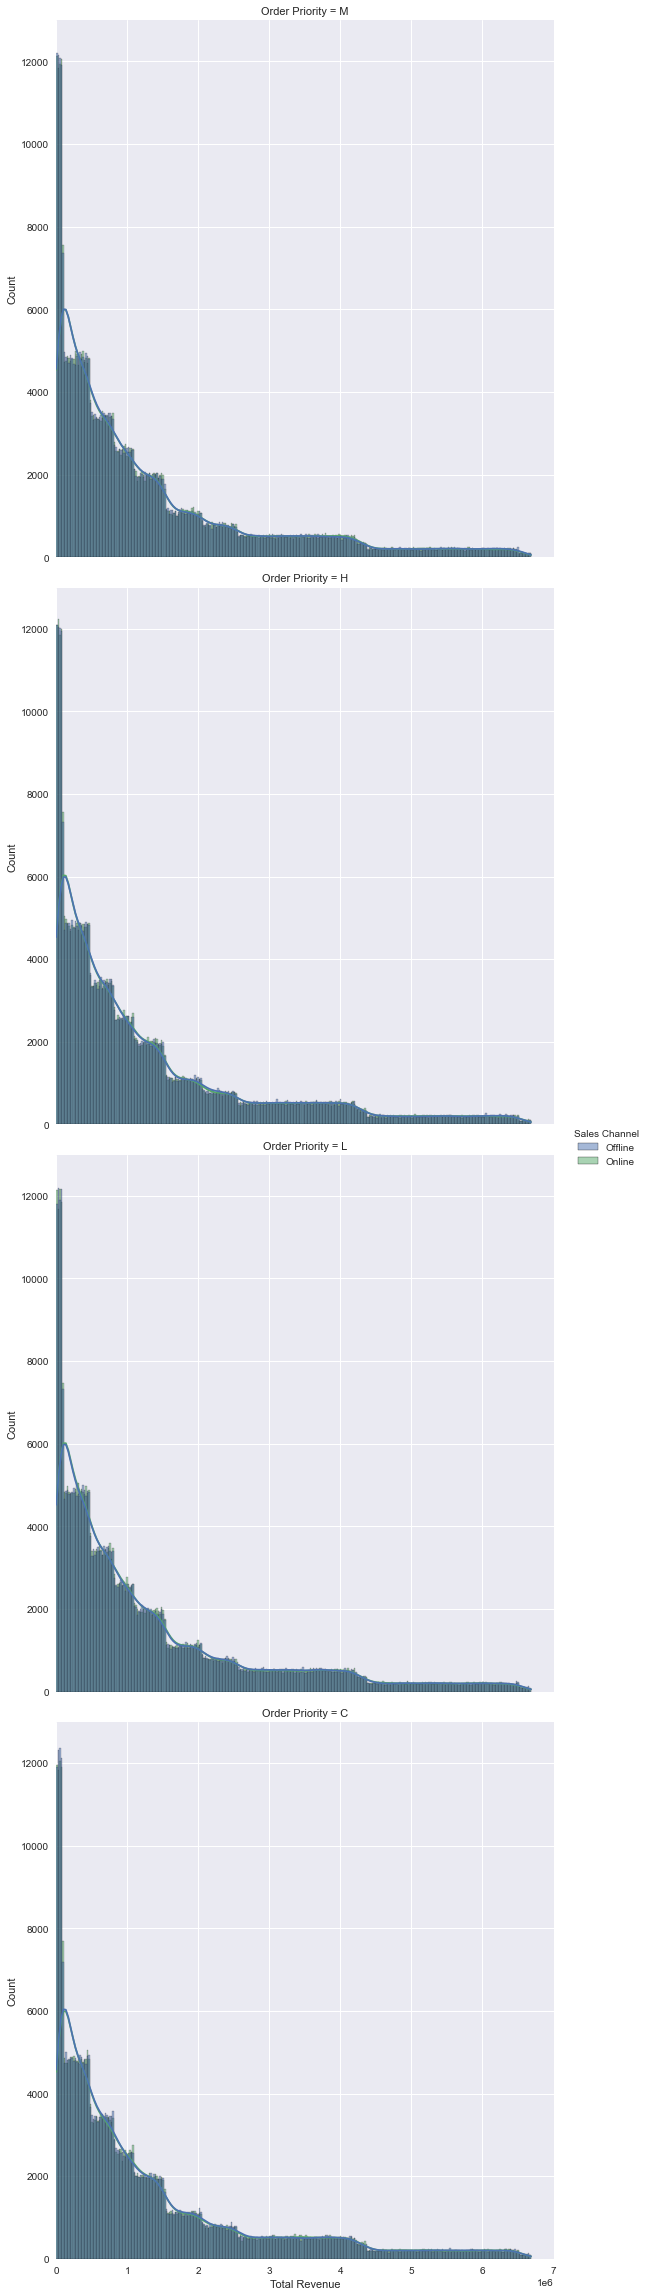

In [15]:
sns.displot(data = df,kde=True,x="Total Revenue",height=8,hue='Sales Channel',row="Order Priority")
plt.xlim(0, (7)*10**6);

# REGION
## TASK 1: Doanh thu, lợi nhuận, chi phí theo vùng

In [16]:
print (set(df['Region']))

{'Australia and Oceania', 'Middle East and North Africa', 'Central America and the Caribbean', 'Asia', 'North America', 'Sub-Saharan Africa', 'Europe'}


In [17]:
sales_region = df.groupby('Region')['Total Revenue','Total Cost','Total Profit'].sum()
sales_region

,Total Revenue,Total Cost,Total Profit
Region,,,
Asia,5.849481e+11,4.124017e+11,1.725464e+11
Australia and Oceania,3.251725e+11,2.291617e+11,9.601083e+10
Central America and the Caribbean,4.334853e+11,3.055244e+11,1.279609e+11
Europe,1.038580e+12,7.321810e+11,3.063993e+11
Middle East and North Africa,4.984803e+11,3.514795e+11,1.470008e+11
North America,8.757857e+10,6.182854e+10,2.575003e+10
Sub-Saharan Africa,1.042625e+12,7.348078e+11,3.078168e+11


In [18]:
Region = sales_region.index
total_revenue = sales_region['Total Revenue']
total_cost = sales_region['Total Cost']
total_profit = sales_region['Total Profit']
x = np.arange(1,len(sales_region.index)+1)
x

array([1, 2, 3, 4, 5, 6, 7])

In [19]:
idxmax_revenue = sales_region['Total Revenue'].idxmax()
print(f'Region has the best revenue is {idxmax_revenue} (BILLION DOLLAR (value x 10^9):\n{sales_region.max()/10**9}')

Region has the best revenue is Sub-Saharan Africa (BILLION DOLLAR (value x 10^9):
Total Revenue    1042.624520
Total Cost        734.807751
Total Profit      307.816770
dtype: float64


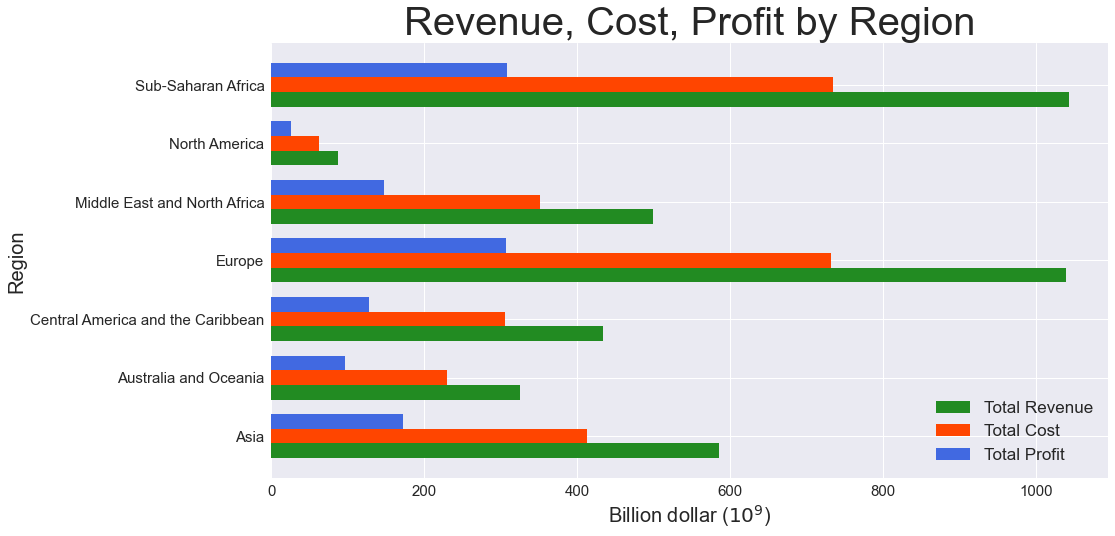

In [20]:
BAR_WIDTH = 0.25
fig , ax = plt.subplots(figsize=(15,8))
ax.barh(x-BAR_WIDTH,total_revenue/10**9,BAR_WIDTH,color='forestgreen')
ax.barh(x,total_cost/10**9,BAR_WIDTH,color='orangered')
ax.barh(x+BAR_WIDTH,total_profit/10**9,BAR_WIDTH,color='royalblue')
plt.yticks(x,Region)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Revenue, Cost, Profit by Region',fontsize = 40)
ax.set_xlabel('Billion dollar ($10^9$)',fontsize=20)
ax.set_ylabel('Region',fontsize=20)
ax.xaxis.label.set_size(20)
plt.legend(['Total Revenue','Total Cost','Total Profit'],fontsize=17);

## TASK 2: Số lượng và doanh thu từng loại vật phẩm đã bán theo vùng
### Dữ liệu loại vật phẩm được chia theo vùng

In [21]:
Asia_itemtype = df[df['Region'] == 'Asia'].groupby('Item Type')['Units Sold','Total Revenue'].sum()
AaO_itemtype = df[df['Region'] == 'Australia and Oceania'].groupby('Item Type')['Units Sold','Total Revenue'].sum()
CAaC_itemtype = df[df['Region'] == 'Central America and the Caribbean'].groupby('Item Type')['Units Sold','Total Revenue'].sum()
Europe_itemtype = df[df['Region'] == 'Europe'].groupby('Item Type')['Units Sold','Total Revenue'].sum()
MEaNA_itemtype = df[df['Region'] == 'Middle East and North Africa'].groupby('Item Type')['Units Sold','Total Revenue'].sum()
NA_itemtype = df[df['Region'] == 'North America'].groupby('Item Type')['Units Sold','Total Revenue'].sum()
SA_itemtype = df[df['Region'] == 'Sub-Saharan Africa'].groupby('Item Type')['Units Sold','Total Revenue'].sum()

In [22]:
pd.DataFrame((np.array(list(Asia_itemtype.index)).reshape(1,12)))

,0,1,2,3,4,5,6,7,8,9,10,11
0,Baby Food,Beverages,Cereal,Clothes,Cosmetics,Fruits,Household,Meat,Office Supplies,Personal Care,Snacks,Vegetables


### Baby food by Region

In [23]:
BabyFood_Region_UnitsSold_list =    [
                                    Asia_itemtype.loc['Baby Food']['Units Sold'],
                                    AaO_itemtype.loc['Baby Food']['Units Sold'],
                                    CAaC_itemtype.loc['Baby Food']['Units Sold'],
                                    Europe_itemtype.loc['Baby Food']['Units Sold'],
                                    MEaNA_itemtype.loc['Baby Food']['Units Sold'],
                                    NA_itemtype.loc['Baby Food']['Units Sold'],
                                    SA_itemtype.loc['Baby Food']['Units Sold'],
                                    ]
BabyFood_Region_TotalRevenue_list = [
                                    Asia_itemtype.loc['Baby Food']['Total Revenue'],
                                    AaO_itemtype.loc['Baby Food']['Total Revenue'],
                                    CAaC_itemtype.loc['Baby Food']['Total Revenue'],
                                    Europe_itemtype.loc['Baby Food']['Total Revenue'],
                                    MEaNA_itemtype.loc['Baby Food']['Total Revenue'],
                                    NA_itemtype.loc['Baby Food']['Total Revenue'],
                                    SA_itemtype.loc['Baby Food']['Total Revenue'],
                                    ]

In [24]:
BabyFood_Region_UnitsSold_np = np.array(BabyFood_Region_UnitsSold_list) 
BabyFood_Region_TotalRevenue_np = np.array(BabyFood_Region_TotalRevenue_list) 

In [25]:
max_UnitsSold = max(BabyFood_Region_UnitsSold_list)
max_TotalRevenue = max(BabyFood_Region_TotalRevenue_list)
print(f'The best baby food units, revenue are sold by Region is: {int(max_UnitsSold.max())} Units, {round (max_TotalRevenue/10**9,3)} BILLION $')

The best baby food units, revenue are sold by Region is: 325775821 Units, 83.164 BILLION $


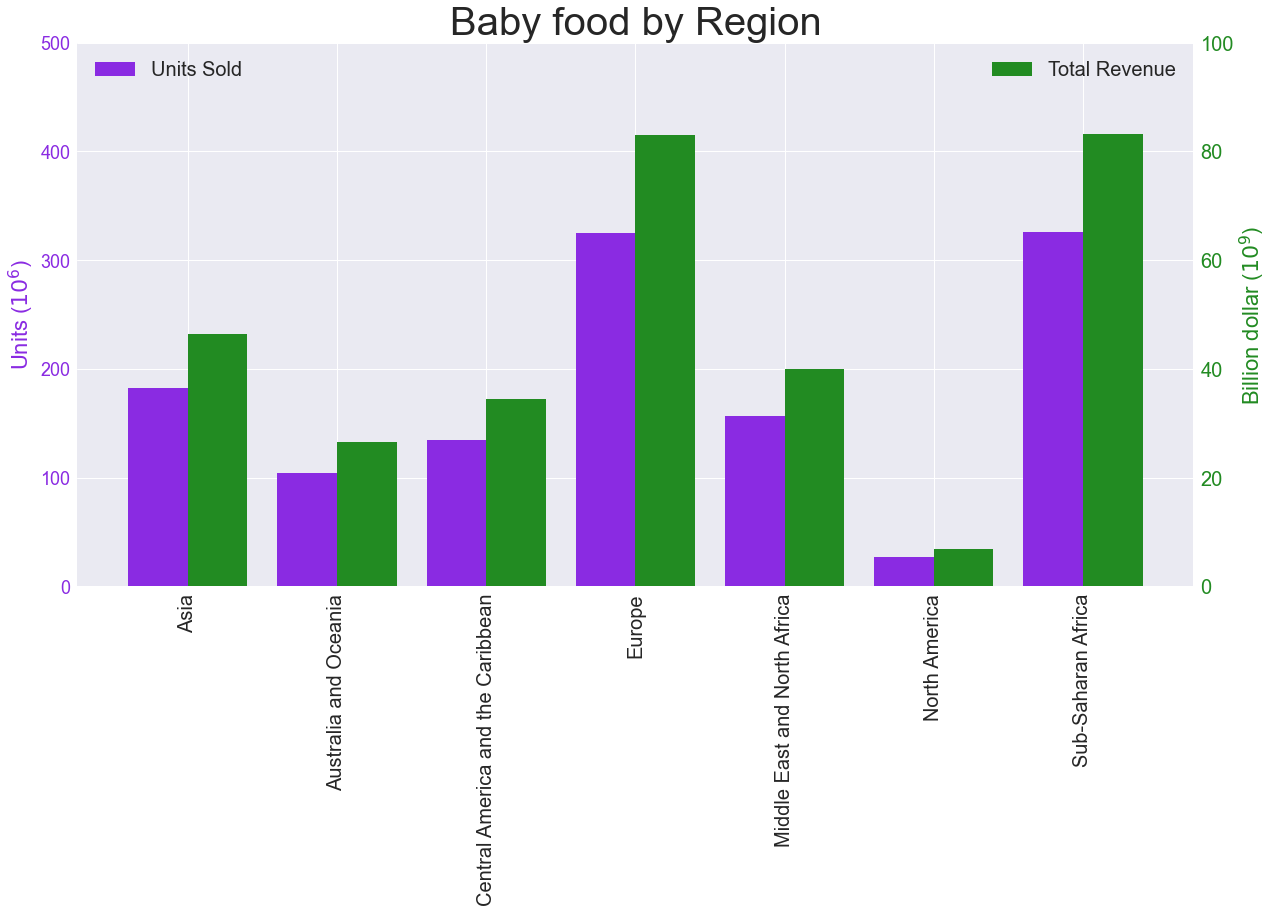

In [26]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title('Baby food by Region',fontsize = 40)

BAR_WIDTH_BF = 0.4
ax1.bar(x-BAR_WIDTH_BF/2,BabyFood_Region_UnitsSold_np/10**6,BAR_WIDTH_BF,color='blueviolet')
ax1.set_ylabel('Units ($10^6$)', color='blueviolet',fontsize=22)
ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.set_ylim(0,500)
plt.yticks(size=18)
plt.legend(['Units Sold'],fontsize=20,loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x+BAR_WIDTH_BF/2,BabyFood_Region_TotalRevenue_np/10**9,BAR_WIDTH_BF,color='forestgreen')
ax2.set_ylabel('Billion dollar ($10^9$)', color='forestgreen',fontsize=22)
ax2.tick_params(axis='y', labelcolor='forestgreen')
ax2.set_ylim(0,100)
plt.yticks(size=20)
plt.legend(['Total Revenue'],fontsize=20)
ax2.grid(False)

plt.xticks(x,Region)
ax1.set_xticklabels(Region,rotation=90, size=20);

### Clothes by Region

In [27]:
Clothes_Region_UnitsSold_list =     [ 
                                    Asia_itemtype.loc['Clothes']['Units Sold'],
                                    AaO_itemtype.loc['Clothes']['Units Sold'],
                                    CAaC_itemtype.loc['Clothes']['Units Sold'],
                                    Europe_itemtype.loc['Clothes']['Units Sold'],
                                    MEaNA_itemtype.loc['Clothes']['Units Sold'],
                                    NA_itemtype.loc['Clothes']['Units Sold'],
                                    SA_itemtype.loc['Clothes']['Units Sold'],
                                    ]
Clothes_Region_TotalRevenue_list =  [
                                    Asia_itemtype.loc['Clothes']['Total Revenue'],
                                    AaO_itemtype.loc['Clothes']['Total Revenue'],
                                    CAaC_itemtype.loc['Clothes']['Total Revenue'],
                                    Europe_itemtype.loc['Clothes']['Total Revenue'],
                                    MEaNA_itemtype.loc['Clothes']['Total Revenue'],
                                    NA_itemtype.loc['Clothes']['Total Revenue'],
                                    SA_itemtype.loc['Clothes']['Total Revenue'],
                                    ]

In [28]:
Clothes_Region_UnitsSold_np = np.array(Clothes_Region_UnitsSold_list) 
Clothes_Region_TotalRevenue_np = np.array(Clothes_Region_TotalRevenue_list)

In [29]:
max_UnitsSold = max(Clothes_Region_UnitsSold_list)
max_TotalRevenue = max(Clothes_Region_TotalRevenue_list)
print(f'The best clothes units, revenue are sold by Region is: {int(max_UnitsSold.max())} Units, {round (max_TotalRevenue/10**9,3)} BILLION $')

The best clothes units, revenue are sold by Region is: 328384921 Units, 35.886 BILLION $


In [30]:
Clothes_Region_TotalRevenue_list

[19984247133.119846,
 10921092957.599937,
 14882823529.599953,
 35726479508.96,
 17016734308.160006,
 2924469400.0000052,
 35885904166.88007]

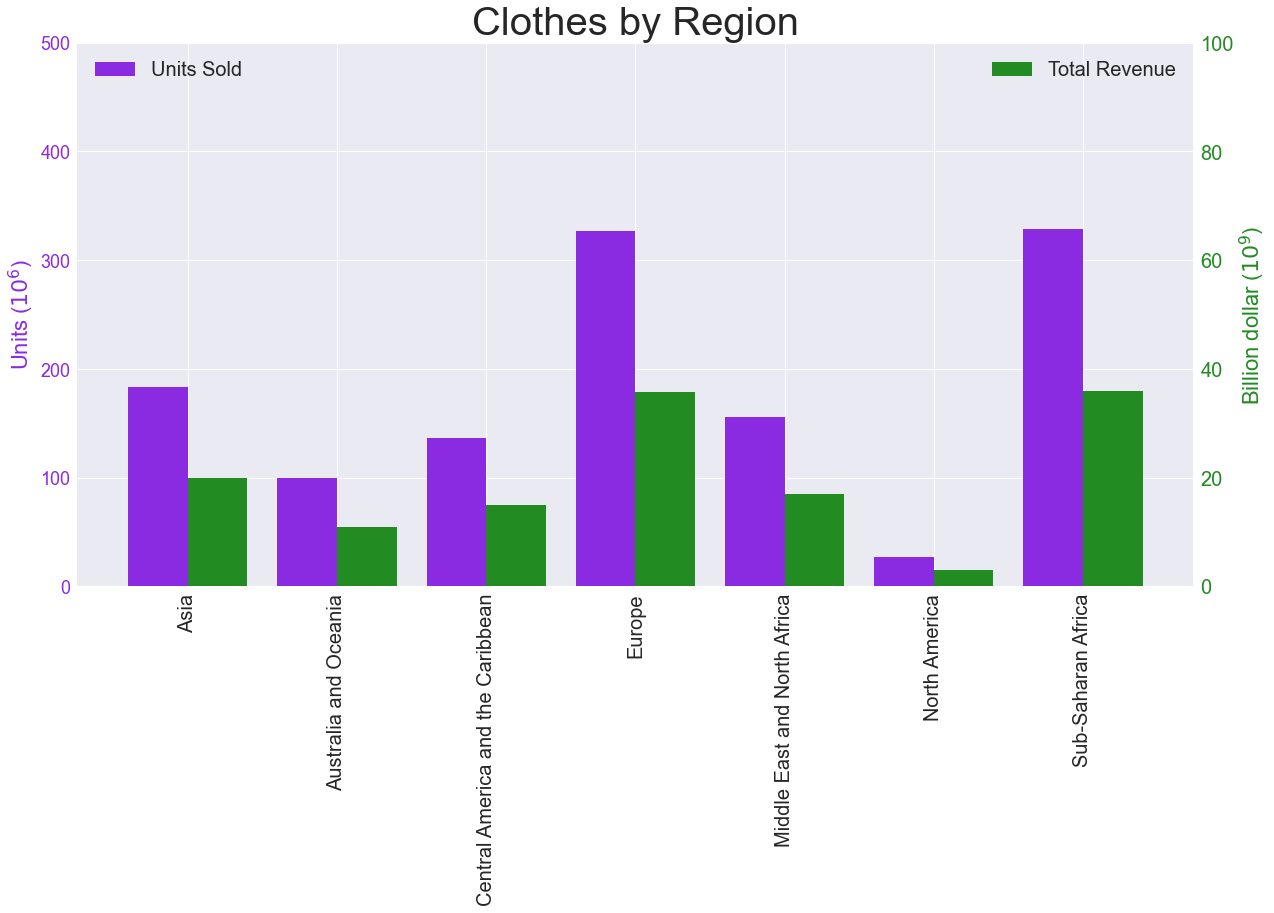

In [31]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title('Clothes by Region',fontsize = 40)

BAR_WIDTH_BF = 0.4
ax1.bar(x-BAR_WIDTH_BF/2,Clothes_Region_UnitsSold_np/10**6,BAR_WIDTH_BF,color='blueviolet')
ax1.set_ylabel('Units ($10^6$)', color='blueviolet',fontsize=22)
ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.set_ylim(0,500)
plt.yticks(size=18)
plt.legend(['Units Sold'],fontsize=20,loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x+BAR_WIDTH_BF/2,Clothes_Region_TotalRevenue_np/10**9,BAR_WIDTH_BF, color='forestgreen')
ax2.set_ylabel('Billion dollar ($10^9$)', color='forestgreen',fontsize=22)
ax2.tick_params(axis='y', labelcolor='forestgreen')
ax2.set_ylim(0,100)
plt.yticks(size=20)
plt.legend(['Total Revenue'],fontsize=20)
ax2.grid(False)

plt.xticks(x,Region)
ax1.set_xticklabels(Region,rotation=90, size=20);

### Vegetables by Region

In [32]:
Vegetables_Region_UnitsSold_list =  [
                                    Asia_itemtype.loc['Vegetables']['Units Sold'],
                                    AaO_itemtype.loc['Vegetables']['Units Sold'],
                                    CAaC_itemtype.loc['Vegetables']['Units Sold'],
                                    Europe_itemtype.loc['Vegetables']['Units Sold'],
                                    MEaNA_itemtype.loc['Vegetables']['Units Sold'],
                                    NA_itemtype.loc['Vegetables']['Units Sold'],
                                    SA_itemtype.loc['Vegetables']['Units Sold'],
                                    ]
Vegetables_Region_TotalRevenue_list=[
                                    Asia_itemtype.loc['Vegetables']['Total Revenue'],
                                    AaO_itemtype.loc['Vegetables']['Total Revenue'],
                                    CAaC_itemtype.loc['Vegetables']['Total Revenue'],
                                    Europe_itemtype.loc['Vegetables']['Total Revenue'],
                                    MEaNA_itemtype.loc['Vegetables']['Total Revenue'],
                                    NA_itemtype.loc['Vegetables']['Total Revenue'],
                                    SA_itemtype.loc['Vegetables']['Total Revenue'],
                                    ]

In [33]:
Vegetables_Region_UnitsSold_np = np.array(Vegetables_Region_UnitsSold_list) 
Vegetables_Region_TotalRevenue_np = np.array(Vegetables_Region_TotalRevenue_list) 

In [34]:
max_UnitsSold = max(Vegetables_Region_UnitsSold_list)
max_TotalRevenue = max(Vegetables_Region_TotalRevenue_list)
print(f'The best vegetables units, revenue are sold by Region is: {int(max_UnitsSold.max())} Units, {round (max_TotalRevenue/10**9,3)} BILLION $')

The best vegetables units, revenue are sold by Region is: 327239394 Units, 50.415 BILLION $


In [35]:
Vegetables_Region_TotalRevenue_list

[28217800760.66015,
 15671574174.159985,
 20783876872.680103,
 49755859722.0802,
 23885347779.36001,
 4170043237.420003,
 50414501039.6401]

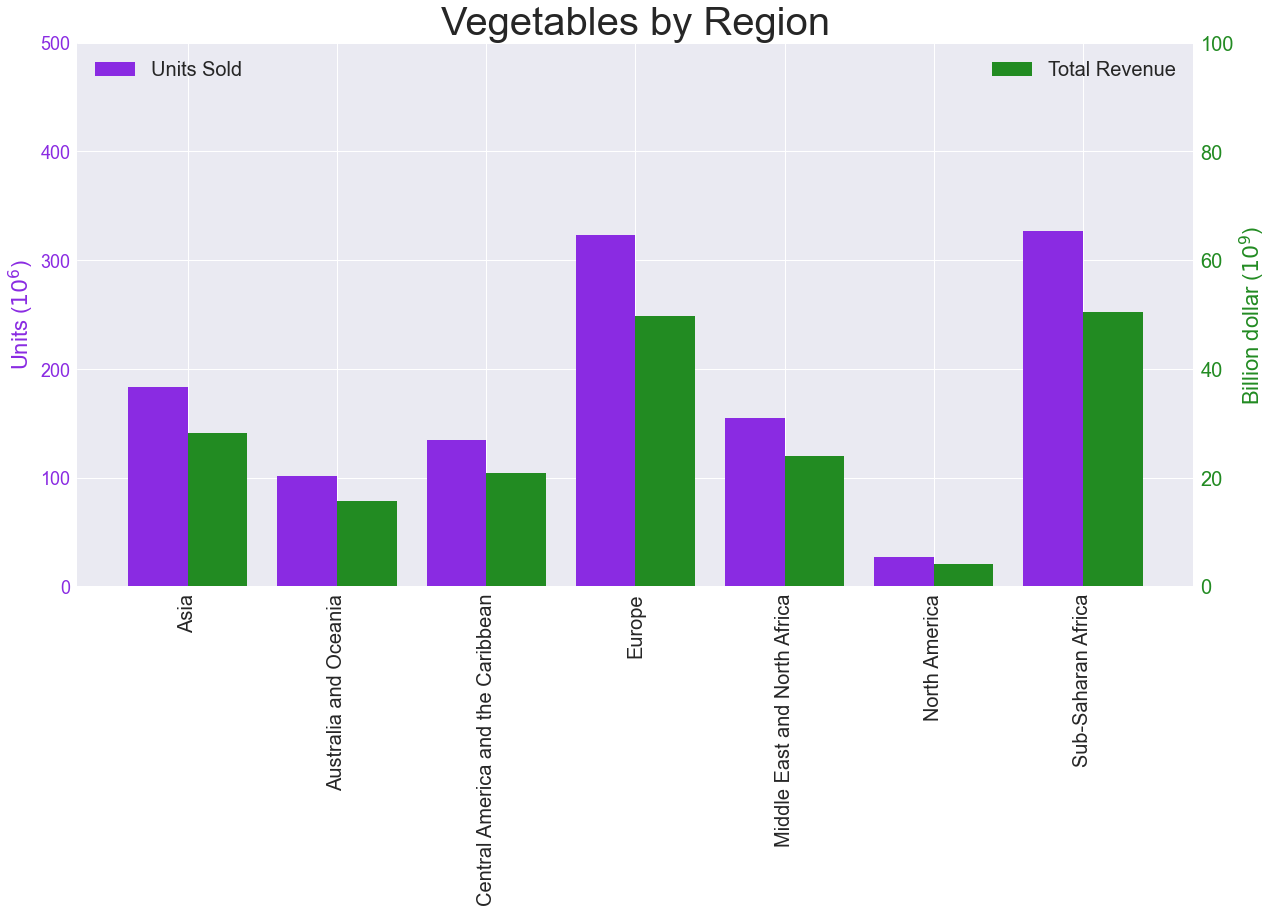

In [36]:
fig, ax1 = plt.subplots(figsize=(20,10))
plt.title('Vegetables by Region',fontsize = 40)

BAR_WIDTH_BF = 0.4
ax1.bar(x-BAR_WIDTH_BF/2,Vegetables_Region_UnitsSold_np/10**6,BAR_WIDTH_BF,color='blueviolet')
ax1.set_ylabel('Units ($10^6$)', color='blueviolet',fontsize=22)
ax1.tick_params(axis='y', labelcolor='blueviolet')
ax1.set_ylim(0,500)
plt.yticks(size=18)
plt.legend(['Units Sold'],fontsize=20,loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x+BAR_WIDTH_BF/2,Vegetables_Region_TotalRevenue_np/10**9,BAR_WIDTH_BF, color='forestgreen')
ax2.set_ylabel('Billion dollar ($10^9$)', color='forestgreen',fontsize=22)
ax2.tick_params(axis='y', labelcolor='forestgreen')
ax2.set_ylim(0,100)
plt.yticks(size=20)
plt.legend(['Total Revenue'],fontsize=20)
ax2.grid(False)

plt.xticks(x,Region)
ax1.set_xticklabels(Region,rotation=90, size=20);

### NOTE : Có thể dùng mẫu trên để vẽ biểu đồ ('Baby Food'): 'Beverages', 'Cereal', 'Cosmetics', 'Fruits', 'Household', 'Meat', 'Office Supplies', 'Personal Care', 'Snacks'

## Task 3: Tỉ lệ mua hàng online và offline theo vùng

In [37]:
region_ratio_sales = df.groupby('Region')['Sales Channel'].value_counts()
pd.DataFrame(region_ratio_sales)

Sales Channel
Region                            Sales Channel               
Asia                              Online                220128
                                  Offline               220064
Australia and Oceania             Online                122304
                                  Offline               121749
Central America and the Caribbean Offline               163589
                                  Online                162184
Europe                            Online                391257
                                  Offline               390396
Middle East and North Africa      Offline               187685
                                  Online                187092
North America                     Offline                32875
                                  Online                 32609
Sub-Saharan Africa                Offline               392104
                                  Online                392064

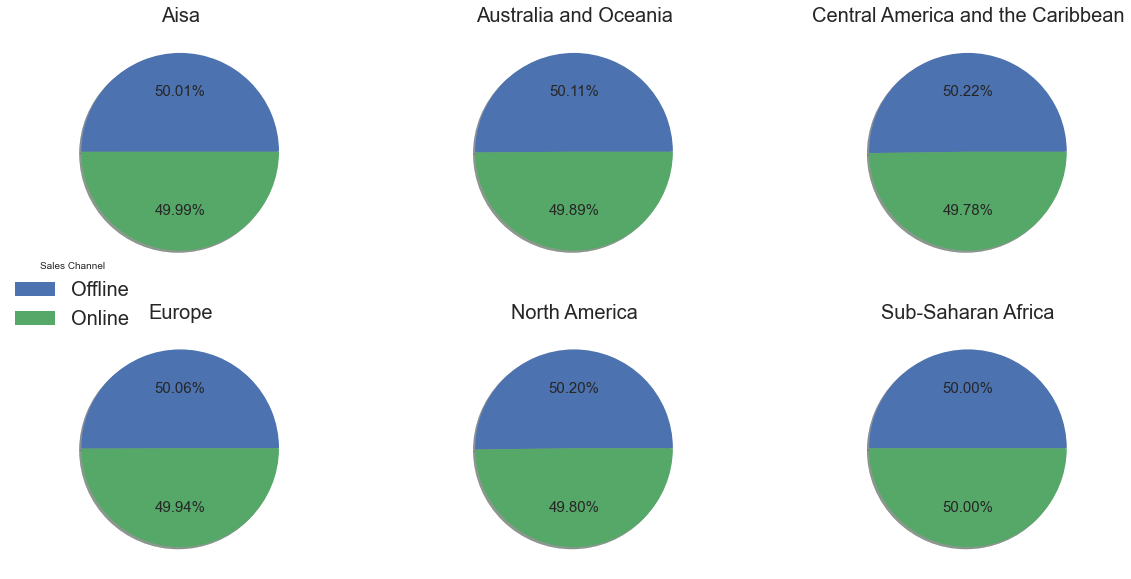

In [38]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(figsize=(20,10),ncols=3,nrows=2)

textprops = {"fontsize":15}

label_OnOff = ['Offline','Online']
ax1.pie(region_ratio_sales['Asia'],autopct='%1.2f%%',shadow = True,textprops = textprops)
ax1.set_title('Aisa',fontsize = 20)
ax1.legend(label_OnOff,title = "Sales Channel",loc=(-0.2,-0.25),fontsize=20)

ax2.pie(region_ratio_sales['Australia and Oceania'],autopct='%1.2f%%',shadow = True,textprops = textprops)
ax2.set_title('Australia and Oceania',fontsize = 20)

ax3.pie(region_ratio_sales['Central America and the Caribbean'],autopct='%1.2f%%',shadow = True,textprops = textprops)
ax3.set_title('Central America and the Caribbean',fontsize = 20)

ax4.pie(region_ratio_sales['Europe'],autopct='%1.2f%%',shadow = True,textprops = textprops)
ax4.set_title('Europe',fontsize = 20)

ax5.pie(region_ratio_sales['North America'],autopct='%1.2f%%',shadow = True,textprops = textprops)
ax5.set_title('North America',fontsize = 20)

ax6.pie(region_ratio_sales['Sub-Saharan Africa'],autopct='%1.2f%%',shadow = True,textprops = textprops)
ax6.set_title('Sub-Saharan Africa',fontsize = 20);

## TASK 4: Loại vật phẩm mua nhiều nhất, doanh thu cao nhất theo vùng

In [39]:
Asia_itemtype_MaxUnitsSold = Asia_itemtype[Asia_itemtype['Units Sold'] == Asia_itemtype.max()[0]]['Units Sold']
Asia_itemtype_MaxTotalRevenue = Asia_itemtype[Asia_itemtype['Total Revenue'] == Asia_itemtype.max()[1]]['Total Revenue']

AaO_itemtype_MaxUnitsSold = AaO_itemtype[AaO_itemtype['Units Sold'] == AaO_itemtype.max()[0]]['Units Sold']
AaO_itemtype_MaxTotalRevenue = AaO_itemtype[AaO_itemtype['Total Revenue'] == AaO_itemtype.max()[1]]['Total Revenue']

CAaC_itemtype_MaxUnitsSold = CAaC_itemtype[CAaC_itemtype['Units Sold'] == CAaC_itemtype.max()[0]]['Units Sold']
CAaC_itemtype_MaxTotalRevenue = CAaC_itemtype[CAaC_itemtype['Total Revenue'] == CAaC_itemtype.max()[1]]['Total Revenue']

Europe_itemtype_MaxUnitsSold = Europe_itemtype[Europe_itemtype['Units Sold'] == Europe_itemtype.max()[0]]['Units Sold']
Europe_itemtype_MaxTotalRevenue = Europe_itemtype[Europe_itemtype['Total Revenue'] == Europe_itemtype.max()[1]]['Total Revenue']

MEaNA_itemtype_MaxUnitsSold = MEaNA_itemtype[MEaNA_itemtype['Units Sold'] == MEaNA_itemtype.max()[0]]['Units Sold']
MEaNA_itemtype_MaxTotalRevenue = MEaNA_itemtype[MEaNA_itemtype['Total Revenue'] == MEaNA_itemtype.max()[1]]['Total Revenue']

NA_itemtype_MaxUnitsSold = NA_itemtype[NA_itemtype['Units Sold'] == NA_itemtype.max()[0]]['Units Sold']
NA_itemtype_MaxTotalRevenue = NA_itemtype[NA_itemtype['Total Revenue'] == NA_itemtype.max()[1]]['Total Revenue']

SA_itemtype_MaxUnitsSold = SA_itemtype[SA_itemtype['Units Sold'] == SA_itemtype.max()[0]]['Units Sold']
SA_itemtype_MaxTotalRevenue = SA_itemtype[SA_itemtype['Total Revenue'] == SA_itemtype.max()[1]]['Total Revenue']

### 4.1 Loại vật phẩm mua nhiều nhất 

In [40]:
SA_itemtype_MaxUnitsSold

Item Type
Clothes    328384921
Name: Units Sold, dtype: int64

In [41]:
region_itemtype_MaxUnitsSold_df = pd.DataFrame(pd.concat([Asia_itemtype_MaxUnitsSold,AaO_itemtype_MaxUnitsSold,CAaC_itemtype_MaxUnitsSold,Europe_itemtype_MaxUnitsSold,MEaNA_itemtype_MaxUnitsSold,NA_itemtype_MaxUnitsSold,SA_itemtype_MaxUnitsSold])).reset_index()
region_itemtype_MaxUnitsSold_df.insert(0, "Region", Region)
region_itemtype_MaxUnitsSold_df

,Region,Item Type,Units Sold
0,Asia,Snacks,185957547
1,Australia and Oceania,Baby Food,103961805
2,Central America and the Caribbean,Cosmetics,137295631
3,Europe,Beverages,331082807
4,Middle East and North Africa,Fruits,157619467
5,North America,Household,27924037
6,Sub-Saharan Africa,Clothes,328384921


### 4.2 Vật phẩm cho doanh thu cao nhất

In [42]:
region_itemtype_MaxTotalRevenue_df = pd.DataFrame(pd.concat([Asia_itemtype_MaxTotalRevenue,AaO_itemtype_MaxTotalRevenue,CAaC_itemtype_MaxTotalRevenue,Europe_itemtype_MaxTotalRevenue,MEaNA_itemtype_MaxTotalRevenue,NA_itemtype_MaxTotalRevenue,SA_itemtype_MaxTotalRevenue])).reset_index()
region_itemtype_MaxTotalRevenue_df.insert(0, "Region", Region)
region_itemtype_MaxTotalRevenue_df

,Region,Item Type,Total Revenue
0,Asia,Household,1.218320e+11
1,Australia and Oceania,Household,6.715673e+10
2,Central America and the Caribbean,Household,9.063738e+10
3,Europe,Household,2.184656e+11
4,Middle East and North Africa,Household,1.048978e+11
5,North America,Household,1.866080e+10
6,Sub-Saharan Africa,Household,2.189637e+11


# Country

In [43]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,2012
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,2013
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,2015
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28,2017
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18,2016


## TASK: Doanh thu, chi phí, lợi nhuận theo quốc gia
## 20 quốc gia tạo doanh thu cao nhất

In [44]:
country_revenue_df = df.groupby('Country')['Total Revenue','Total Cost','Total Profit'].sum()
country_revenue_df_20 = country_revenue_df.sort_values(by=['Total Revenue'],ascending=False)[:20]
country_revenue_df_20 = country_revenue_df_20/10**10
country_revenue_df_20

,Total Revenue,Total Cost,Total Profit
Country,,,
Singapore,2.229650,1.574477,0.655173
Maldives,2.229369,1.578231,0.651137
Panama,2.227852,1.573863,0.653989
San Marino,2.227241,1.573000,0.654241
Rwanda,2.226037,1.572645,0.653392
Australia,2.225814,1.569305,0.656509
Chad,2.224957,1.567558,0.657399
Saint Kitts and Nevis,2.222336,1.572445,0.649890
New Zealand,2.222251,1.561543,0.660708


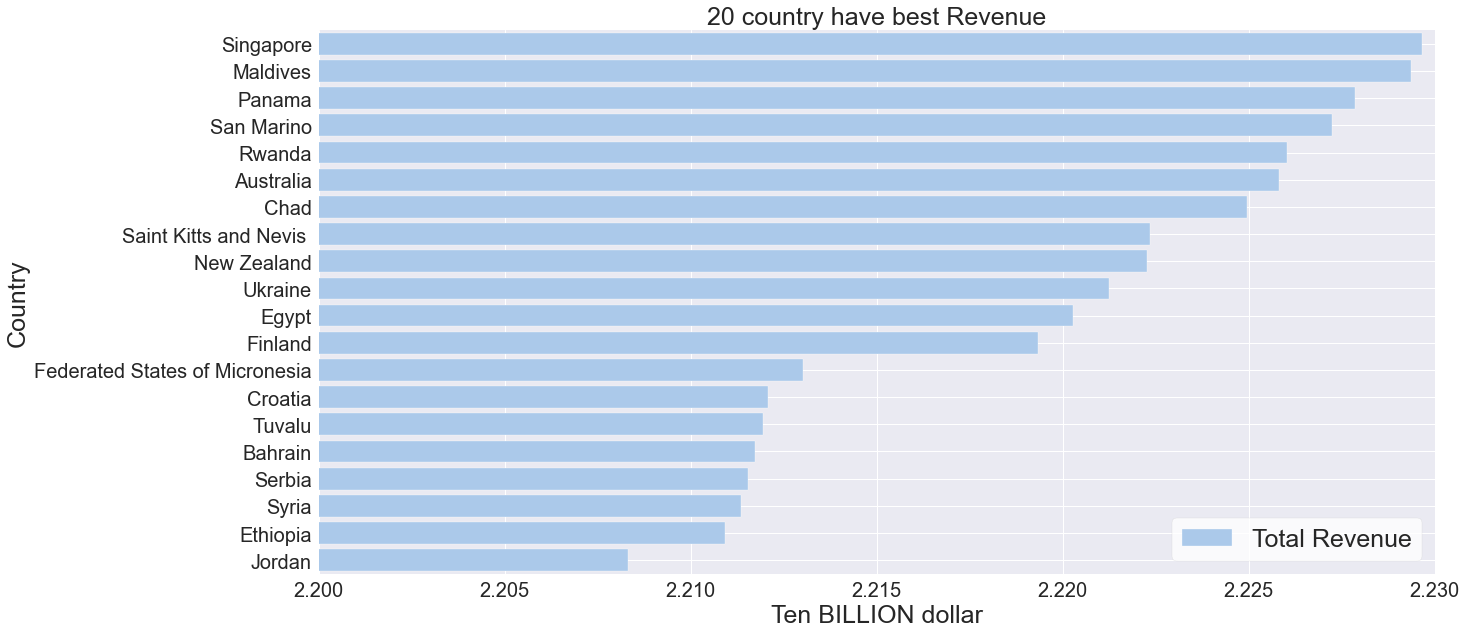

In [45]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.set_style('white')
sns.set_color_codes("pastel")
sns.barplot(x='Total Revenue', y=country_revenue_df_20.index,data=country_revenue_df_20,
            label="Total Revenue", color="b")
            
ax.legend(ncol=2, loc="lower right", frameon=True,fontsize=25)
ax.set(xlim=(2.2, 2.230))
ax.set_ylabel('Country',fontsize=25)
ax.set_xlabel('Ten BILLION dollar',fontsize=25)
plt.xticks(size=20)
plt.yticks(size=20)
ax.set_title('20 country have best Revenue',fontsize = 25)
sns.despine(left=True, bottom=True)
plt.grid(True);

## TASK: Quốc gia cho doanh thu cao nhất theo từng năm (Xử lý với các files năm)
# Order ID

In [46]:
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13,2012
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84,2013
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00,2015


In [47]:
df.loc[df['Order ID']==546093308]

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year
406677,Sub-Saharan Africa,Comoros,Household,Online,L,6/26/2011,546093308,7/3/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,2011
754581,Sub-Saharan Africa,Comoros,Household,Online,L,6/27/2011,546093308,7/4/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,2011
406677,Sub-Saharan Africa,Comoros,Household,Online,L,6/26/2011,546093308,7/3/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,2011
754581,Sub-Saharan Africa,Comoros,Household,Online,L,6/27/2011,546093308,7/4/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,2011
406677,Sub-Saharan Africa,Comoros,Household,Online,L,6/26/2011,546093308,7/3/2011,10000,668.27,502.54,6682700.0,5025400.0,1657300.0,2011


## TASK: TOP các khách hàng đem lại doanh thu cao nhất (Tính theo ID)

In [48]:
ID_HighRevenue_df = pd.DataFrame(df.groupby('Order ID')['Total Revenue'].sum()).reset_index()
ID_HighRevenue_df = ID_HighRevenue_df.sort_values(by=['Total Revenue'],ascending=False)[:20]
ID_HighRevenue_df['Order ID'] = ID_HighRevenue_df['Order ID'].astype(str)
ID_HighRevenue_df['Total Revenue'] = ID_HighRevenue_df['Total Revenue']/10**7
ID_HighRevenue_df

,Order ID,Total Revenue
636465,546093308,3.341350
1281570,998914992,3.341016
1051264,837555015,3.340013
702902,592828547,3.340013
824505,678560531,3.339679
1235541,966744363,3.339679
884538,720835149,3.339345
1119728,885473001,3.339011
1181694,928930366,3.339011
360584,352562701,3.339011


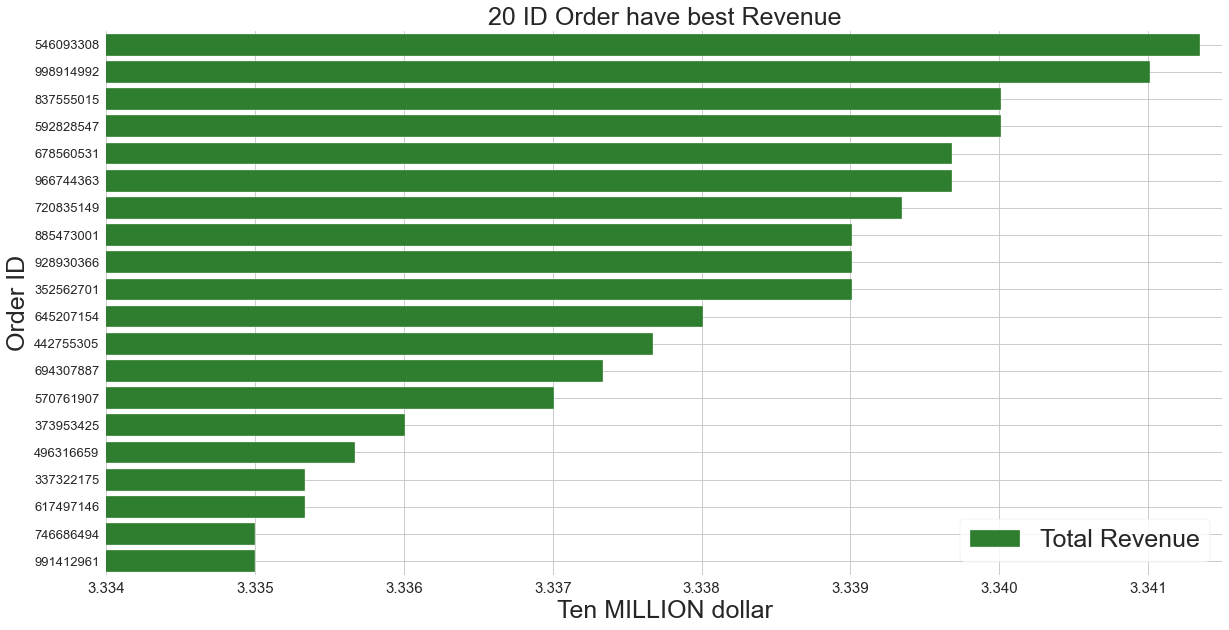

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.set_style('white')
sns.set_color_codes("pastel")
sns.barplot(x='Total Revenue', y='Order ID',data=ID_HighRevenue_df,
            label="Total Revenue",color='forestgreen')
            
ax.legend(ncol=2, loc="lower right", frameon=True,fontsize=25)
ax.set(xlim=(3.3340, 3.3415))
ax.set_ylabel('Order ID',fontsize=25)
ax.set_xlabel('Ten MILLION dollar',fontsize=25)
plt.xticks(size=15)
plt.yticks(size=13)
ax.set_title('20 ID Order have best Revenue',fontsize = 25)
sns.despine(left=True, bottom=True)
plt.grid(True);

# Item Type
## TASK 1: Doanh thu trung bình của từng sản phẩm 

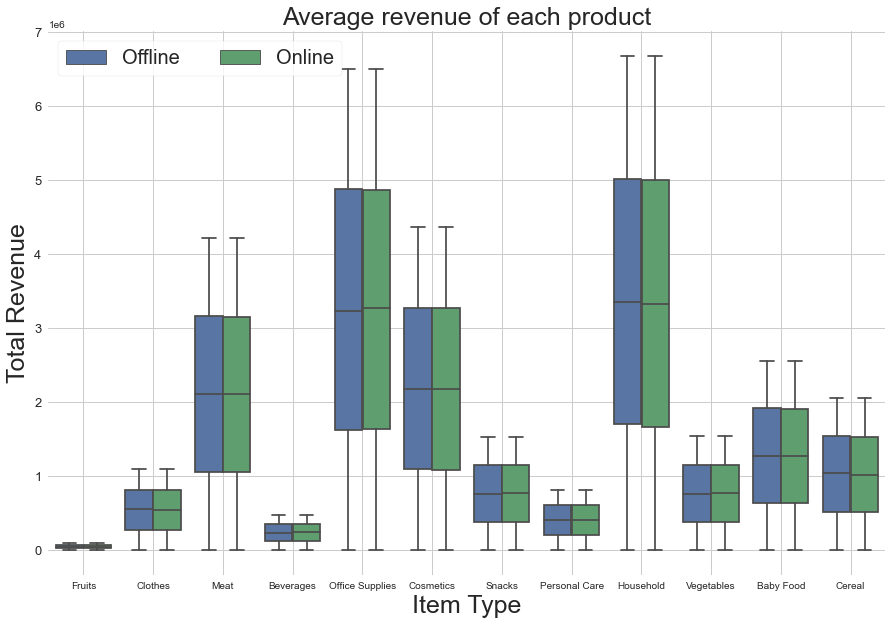

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
colors_col = plt.cm.Set3(np.linspace(0, 1, len(df['Item Type'])))
sns.boxplot(data=df , x='Item Type',y='Total Revenue',hue="Sales Channel")
ax.set_ylabel('Total Revenue',fontsize=25)
ax.set_xlabel('Item Type',fontsize=25)
plt.xticks(size=10)
plt.yticks(size=13)
ax.set_title('Average revenue of each product',fontsize = 25)
plt.grid(True)
ax.legend(ncol=2,loc=0, frameon=True,fontsize=20);

## TASK 2: Số lượng đơn hàng trung bình của từng sản phẩm 

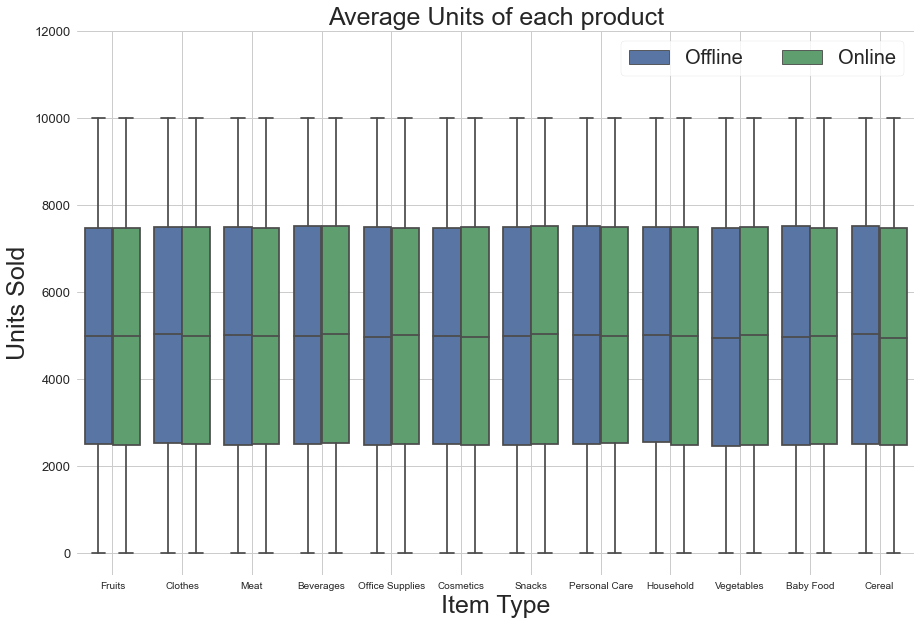

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
colors_col = plt.cm.Set3(np.linspace(0, 1, len(df['Item Type'])))
sns.boxplot(data=df , x = "Item Type", y="Units Sold",hue='Sales Channel')
ax.set_ylabel('Units Sold',fontsize=25)
ax.set_xlabel('Item Type',fontsize=25)
plt.xticks(size=10)
plt.yticks(size=13)
ax.set(ylim=(None, 12000))
ax.set_title('Average Units of each product',fontsize = 25)
plt.grid(True)
ax.legend(ncol=2, loc=0, frameon=True,fontsize=20);